# Algorithm behind Principal Component Analysis

### Motive behind Data pre-processing
Motive behind Data Processing or Mining is obtaining data and process it to create models for analysis. Insights obtained from these models support decision-making process. Before modelling, incomplete data as well as data which does not contribute towards analysis are pre-processed using: 
* Normalization
* Dimensionality reduction

### This notebook describes :
* **How PCA is implemnted manually**
* **How PCA boosts classsfication performance using only 50% of dimnesions of Input features**

## Principal Component Analysis

**Dimensionality Reduction** is data transformation technique that is used to reduce multidimensional data sets to a lower number of dimensions for further analysis. Its goal is to extract the important information from the database.
<br>


**Techniques for Dimensionality Reduction**
* **Elimination** : Drop variables with lesser correlation with target variable
    * This technique achieves results, but we dropped dimensions. Their effect on target variable [however minimal] is completely unaccounted for
* **Extraction** : Analyze varaibles and EXTRACT NEW varaibles [dimensions] from them. Insights from all variables are preserved and variance in target variable can be completely described these new dimensions.
    * This is methodlogy behind PCA : To  **Decompose** data sets as a function of the variance in the data
    * **PCA represents extracted information as a set of new orthogonal variables called principal components, and to display the pattern of similarity of the observations and of the variables as points in maps.**

### Import necessary libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
warnings.filterwarnings('ignore')

### Read red wine data

In [2]:
# references: 
# https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
# https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/
import io
import requests
url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
s=requests.get(url).content
df_red_wine=pd.read_csv(io.StringIO(s.decode('utf-8')), sep=";")

In [3]:
print("shape of red wine data: ", df_red_wine.shape, "\n")
df_red_wine.head()

shape of red wine data:  (1599, 12) 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_red_wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

### Convert to a classification problem

In [5]:
df_red_wine['quality'] = [1 if quality >= 6 else 0 for quality in df_red_wine['quality']]

### Distribution of data
**Right skewed normal distribution** is genral tendancy of data.  

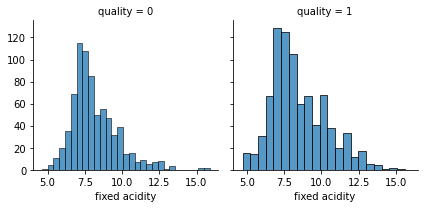

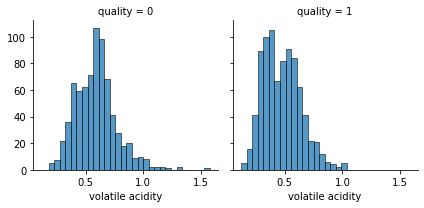

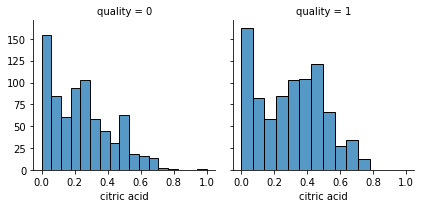

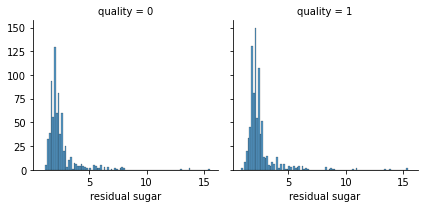

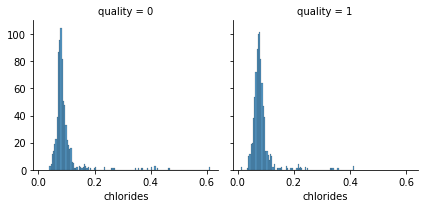

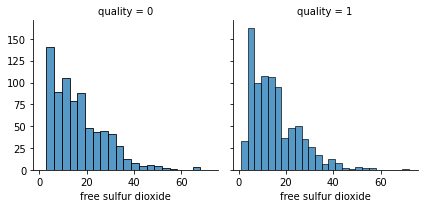

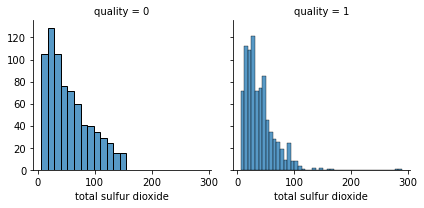

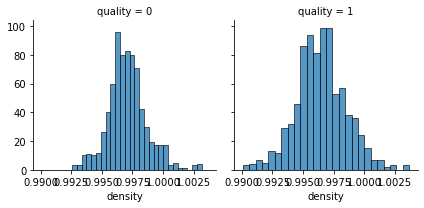

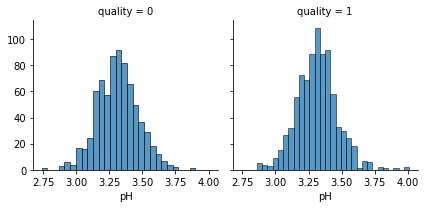

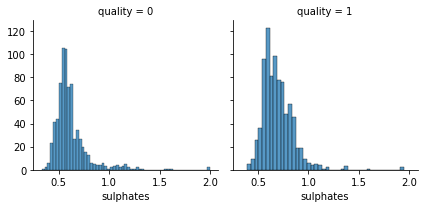

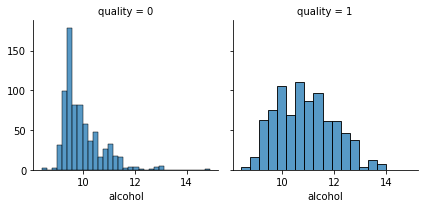

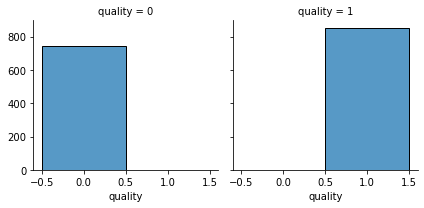

In [6]:
sns.color_palette("Set2")
for col in df_red_wine.columns:
    g = sns.FacetGrid(df_red_wine, col="quality")
    g.map(sns.histplot, col)

### Normalization of input features
* Target feature 'quality' is ommited to form set of input features X
* PCA "extracts" i.e. converts input features into Principal compoents which Maximize Variance
    * **Standardisation i.e. Z-score normalisation is performed on data. It scales data to N(0,1)**
    * Majority of data is normally distributed, so standardization is good choice

In [7]:
X = df_red_wine.drop(['quality'], axis=1)

In [8]:
X_std = StandardScaler().fit_transform(X.values.astype('float64'))
X = pd.DataFrame(X_std, index=X.index, columns=X.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


### Statistics of normalized Input features 
* As observed, all features have mean ~ 0; standard deviation ~ 1
* min and max of features vary as per distance of a datapoint from mean varies. Effect of outliers can not be compensated for in Norm(0,1).

In [9]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,3.910429e-16,-6.221137e-17,4.443669e-17,2.364032e-14,2.861723e-15,6.754377e-16,1.066481e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


<br>
<br>

## PCA calculation : Steps
* Calculating the covariance matrix
* Calculating the eigenvalues and eigenvector
* Forming Principal Components
* Projection into the new feature space

### Covariance matrix
**Dimensions {X1, X2,..Xn} = {fixed acidity, volatile acidity, citric acid, residual sugar, chlorides....pH, sulphates, alcohol}**

Cov(XX) is given by
\begin{bmatrix}\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{1}-\operatorname {E} [X_{1}])]&\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{2}-\operatorname {E} [X_{2}])]&\cdots &\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{n}-\operatorname {E} [X_{n}])]\\\\\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{1}-\operatorname {E} [X_{1}])]&\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{2}-\operatorname {E} [X_{2}])]&\cdots &\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{n}-\operatorname {E} [X_{n}])]\\\\\vdots &\vdots &\ddots &\vdots \\\\\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{1}-\operatorname {E} [X_{1}])]&\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{2}-\operatorname {E} [X_{2}])]&\cdots &\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{n}-\operatorname {E} [X_{n}])]\end{bmatrix}

In [10]:
cov_matrix = np.cov(X.T)

In [61]:
cov_matrix[:3]

array([[ 1.00062578, -0.25629118,  0.67212377,  0.11484855,  0.09376383,
        -0.15389043, -0.11325227,  0.66846534, -0.68340559,  0.18312019,
        -0.06170686],
       [-0.25629118,  1.00062578, -0.55284143,  0.00191908,  0.06133613,
        -0.0105104 ,  0.07651786,  0.02204002,  0.23508431, -0.26115001,
        -0.20241462],
       [ 0.67212377, -0.55284143,  1.00062578,  0.14366701,  0.20395046,
        -0.06101629,  0.03555526,  0.36517555, -0.54224326,  0.31296577,
         0.10997202]])

### Eigenvalues and Eigenvector

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [13]:
for val in eigenvalues:
    print(val)

3.1010718226728273
1.9271148896585149
1.5515137913334218
1.2139917499341308
0.9598923792754817
0.059595582455006985
0.18144664164085156
0.34485778773040704
0.42322137844374963
0.5841565453623766
0.6600210359988645


In [14]:
for val in eigenvectors.T:
    print(val)

[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
  0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
[-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
  0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]
[-0.12330157 -0.44996253  0.23824707  0.10128338 -0.09261383  0.42879287
  0.3224145  -0.33887135  0.05769735  0.27978615  0.47167322]
[-0.22961737  0.07895978 -0.07941826 -0.37279256  0.66619476 -0.04353782
 -0.03457712 -0.17449976 -0.00378775  0.55087236 -0.12218109]
[-0.08261366  0.21873452 -0.05857268  0.73214429  0.2465009  -0.15915198
 -0.22246456  0.15707671  0.26752977  0.22596222  0.35068141]
[-0.63969145 -0.0023886   0.0709103  -0.18402996 -0.05306532  0.05142086
 -0.0687016   0.5673319  -0.3407109  -0.06955538  0.31452591]
[-0.24952314  0.36592473  0.62167708  0.09287208 -0.21767112  0.24848326
 -0.37075027 -0.23999012 -0.0109696   0.11232046 -0.3030145 ]
[ 0.19402091 -0.1291103  -0.38144967  0.00752295  0.111

In [15]:
eigen_map = list(zip(eigenvalues, eigenvectors.T))

In [16]:
eigen_map.sort(key=lambda x: x[0], reverse=True)

In [17]:
sorted_eigenvalues = [pair[0] for pair in eigen_map]
sorted_eigenvectors = [pair[1] for pair in eigen_map]

### Formation of Principal Components

In [18]:
sorted_eigenvalues

[3.1010718226728273,
 1.9271148896585149,
 1.5515137913334218,
 1.2139917499341308,
 0.9598923792754817,
 0.6600210359988645,
 0.5841565453623766,
 0.42322137844374963,
 0.34485778773040704,
 0.18144664164085156,
 0.059595582455006985]

In [19]:
pd.DataFrame(sorted_eigenvectors, columns=df_red_wine.drop(['quality'], axis=1).columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
5,0.101479,0.411449,0.069593,0.049156,0.304339,-0.014000,0.136308,-0.391152,-0.522116,-0.381263,0.361645
6,-0.350227,-0.533735,0.105497,0.290663,0.370413,-0.116596,-0.093662,-0.170481,-0.025138,-0.447469,-0.327651
7,-0.177595,-0.078775,-0.377516,0.299845,-0.357009,-0.204781,0.019036,-0.239223,-0.561391,0.374604,-0.217626
8,0.194021,-0.129110,-0.381450,0.007523,0.111339,0.635405,-0.592116,0.020719,-0.167746,-0.058367,0.037603
9,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


### Explained Variance : choice of Principal compoents

In [20]:
eigenvalue_sum = sum(eigenvalues)
var_exp = [(v / eigenvalue_sum)*100 for v in sorted_eigenvalues]
cum_var_exp = np.cumsum(var_exp)

In [38]:
cum_var_exp

array([ 28.17393128,  45.68220118,  59.77805108,  70.80743772,
        79.52827474,  85.52471351,  90.83190641,  94.67696732,
        97.81007747,  99.4585608 , 100.        ])

In [39]:
dims = len(df_red_wine.drop(['quality'], axis=1).columns)

<Figure size 432x288 with 0 Axes>

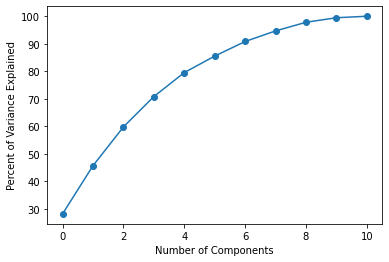

In [40]:
plt.clf()
fig, ax = plt.subplots()

ax.plot(range(dims), cum_var_exp, '-o')

plt.xlabel('Number of Components')
plt.ylabel('Percent of Variance Explained')

plt.show()

### It is noted that 6 eigenvectors describe more than 84% of varaince in target variable  

In [41]:
ev1 = sorted_eigenvectors[0]
ev2 = sorted_eigenvectors[1]
ev3 = sorted_eigenvectors[2]
ev4 = sorted_eigenvectors[3]
ev5 = sorted_eigenvectors[4]
ev6 = sorted_eigenvectors[5]

In [42]:
eigen_matrix = np.hstack((ev1.reshape(dims,1),
                          ev2.reshape(dims,1),
                          ev3.reshape(dims,1),
                          ev4.reshape(dims,1),
                          ev5.reshape(dims,1),
                          ev6.reshape(dims,1)))

In [63]:
eigen_matrix[:3]

array([[ 0.48931422, -0.11050274, -0.12330157, -0.22961737, -0.08261366,
         0.10147858],
       [-0.23858436,  0.27493048, -0.44996253,  0.07895978,  0.21873452,
         0.41144893],
       [ 0.46363166, -0.15179136,  0.23824707, -0.07941826, -0.05857268,
         0.06959338]])

In [44]:
Y = X.dot(eigen_matrix).join(df_red_wine['quality'])

In [45]:
Y.head()

,0,1,2,3,4,5,quality
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,0
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,0
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,0
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,1
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,0


### Distribution of PC against each other for Good(1) and Bad(0) quaity of wine

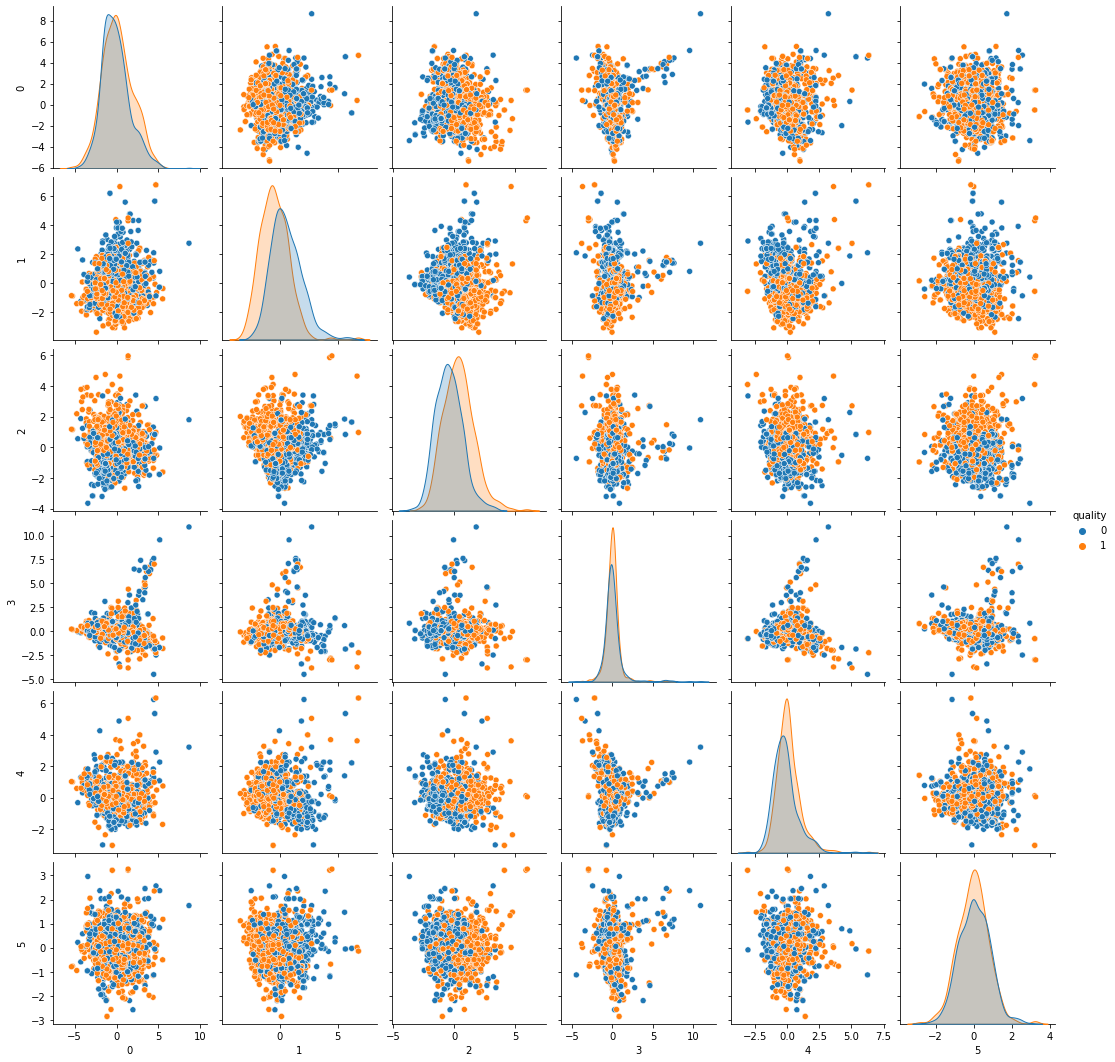

In [46]:
sns.pairplot(data=Y, hue="quality", kind="scatter")

## PCA with scikit-learn library

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
Y_sklearn = pca.fit_transform(X)

<Figure size 432x288 with 0 Axes>

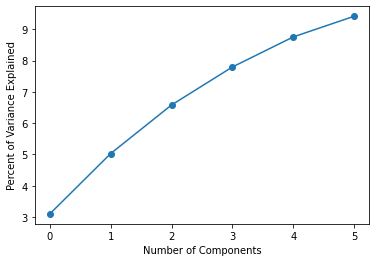

In [48]:
plt.clf()
fig, ax = plt.subplots()

ax.plot(range(6), np.cumsum(pca.explained_variance_), '-o')

plt.xlabel('Number of Components')
plt.ylabel('Percent of Variance Explained')

plt.show()

In [60]:
np.cumsum(pca.explained_variance_)

array([3.10107182, 5.02818671, 6.5797005 , 7.79369225, 8.75358463,
       9.41360567])

In [49]:
Y_sklearn_plt = pd.DataFrame(Y_sklearn, 
                             index=Y.index, 
                             columns=Y.columns[:-1]).join(df_red_wine['quality'])

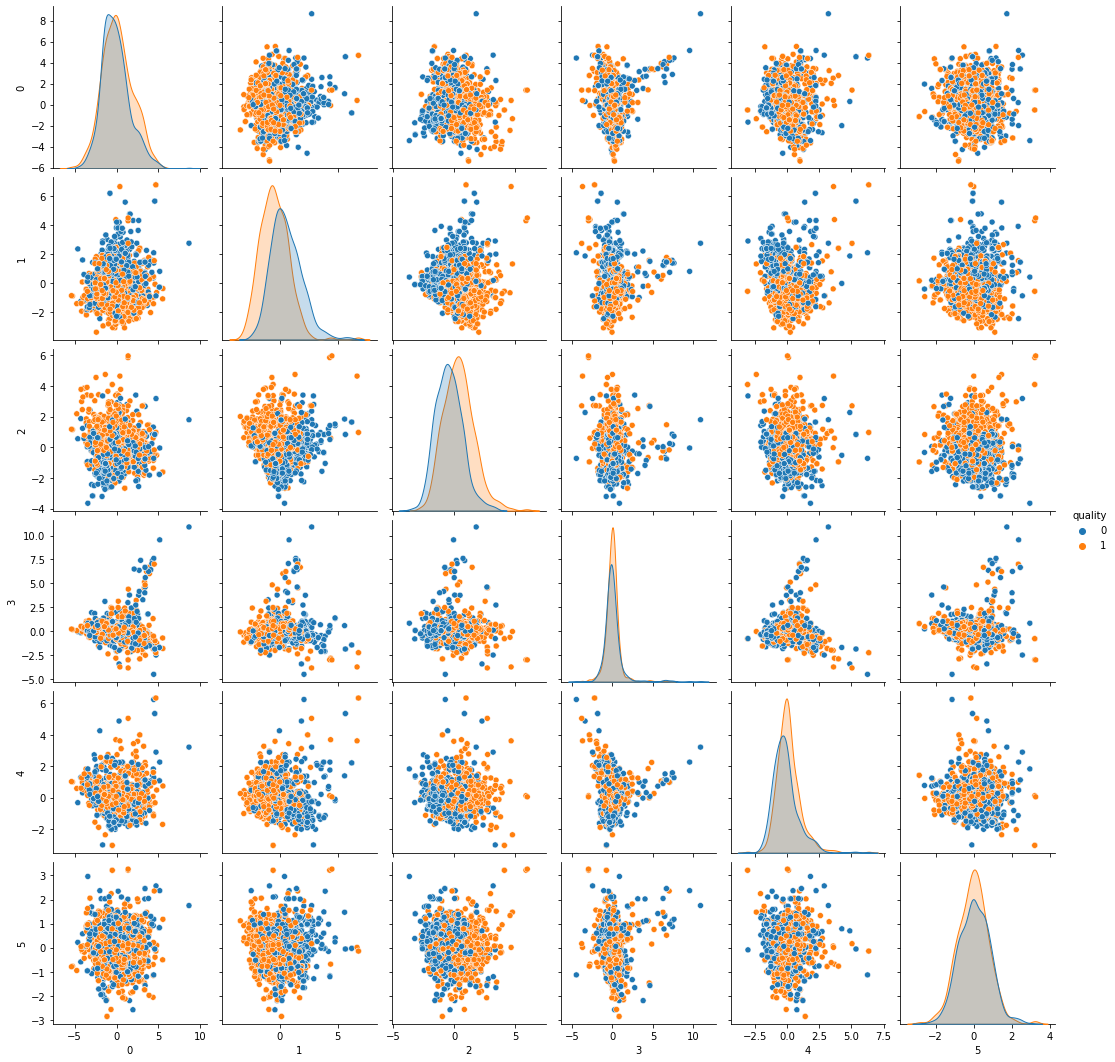

In [50]:
sns.pairplot(data=Y_sklearn_plt, hue="quality")

<br>
<br>

## Performance of classfier : with and without PCA

### Without PCA

In [51]:
y = df_red_wine['quality'].values

In [64]:
# split dataset for training and testing, and use a logistic regression as classifier
X_train, X_test, y_train, y_test = train_test_split(df_red_wine.drop('quality', axis=1), y, test_size=0.25)

In [53]:
classifier = LogisticRegression(random_state= 0)

In [54]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [55]:
y_pred = classifier.score(X_test, y_test)
y_pred

0.7125

### With PCA

In [65]:
X_train, X_test, y_train, y_test = train_test_split(Y_sklearn, y, test_size=0.3)

In [57]:
classifier_with_pca = LogisticRegression(random_state=0)
classifier_with_pca.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [58]:
y_pred = classifier_with_pca.score(X_test, y_test)
y_pred

0.7458333333333333

## Resources

* https://www.sciencedirect.com/science/article/pii/B9780080448947013038 
* H. Abdi and L. J. Williams, "Principal component analysis," Wiley Interdisciplinary Reviews. Computational Statistics, vol. 2, (4), pp. 433-459, 2010.